<a href="https://colab.research.google.com/github/AlmaLeoz/Proyecto-Parte-III/blob/main/proyecto_vinos_leoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Ciencia de Datos - Parte III
# Análisis de Vinos Argentinos

# 1. Importación de bibliotecas necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2. Carga de datos
# Creamos un dataset sintético de vinos argentinos

In [ ]:
np.random.seed(42)
n_muestras = 1000

# Creamos características del vino
datos = {
    'grado_alcohol': np.random.normal(13.5, 1.2, n_muestras),
    'acidez': np.random.normal(6.8, 0.8, n_muestras),
    'ph': np.random.normal(3.5, 0.2, n_muestras),
    'azucar_residual': np.random.normal(2.5, 1.0, n_muestras),
    'cloruro': np.random.normal(0.08, 0.02, n_muestras),
    'densidad': np.random.normal(0.996, 0.002, n_muestras),
    'sulfatos': np.random.normal(0.6, 0.1, n_muestras),
    'taninos': np.random.normal(85, 15, n_muestras),
    'color_intensidad': np.random.normal(8, 2, n_muestras),
    'edad_meses': np.random.normal(24, 8, n_muestras)
}

X = pd.DataFrame(datos)

# Creamos una clasificación binaria (calidad alta/baja)
# Basada en una combinación de características
calidad = (X['grado_alcohol'] * 0.3 +
          X['taninos'] * 0.2 +
          X['edad_meses'] * 0.2 +
          X['acidez'] * 0.15 +
          X['color_intensidad'] * 0.15)
y = (calidad > calidad.mean()).astype(int)

# 3. Análisis exploratorio de datos

Dimensiones del dataset: (1000, 10)

Distribución de clases (0: Calidad Regular, 1: Calidad Premium):
1    0.508
0    0.492
Name: proportion, dtype: float64

Estadísticas descriptivas:
       grado_alcohol       acidez           ph  azucar_residual      cloruro  \
count    1000.000000  1000.000000  1000.000000      1000.000000  1000.000000   
mean       13.523198     6.856669     3.501167         2.481281     0.079015   
std         1.175059     0.797964     0.196691         1.027133     0.019848   
min         9.610479     4.447689     2.896098        -0.429449     0.016466   
25%        12.722892     6.315007     3.370400         1.762580     0.066348   
50%        13.530361     6.850462     3.499950         2.500185     0.079635   
75%        14.277533     7.383106     3.632183         3.166945     0.092782   
max        18.123278     9.354486     4.285248         5.743093     0.142258   

          densidad     sulfatos      taninos  color_intensidad   edad_meses  
count  1000.0000

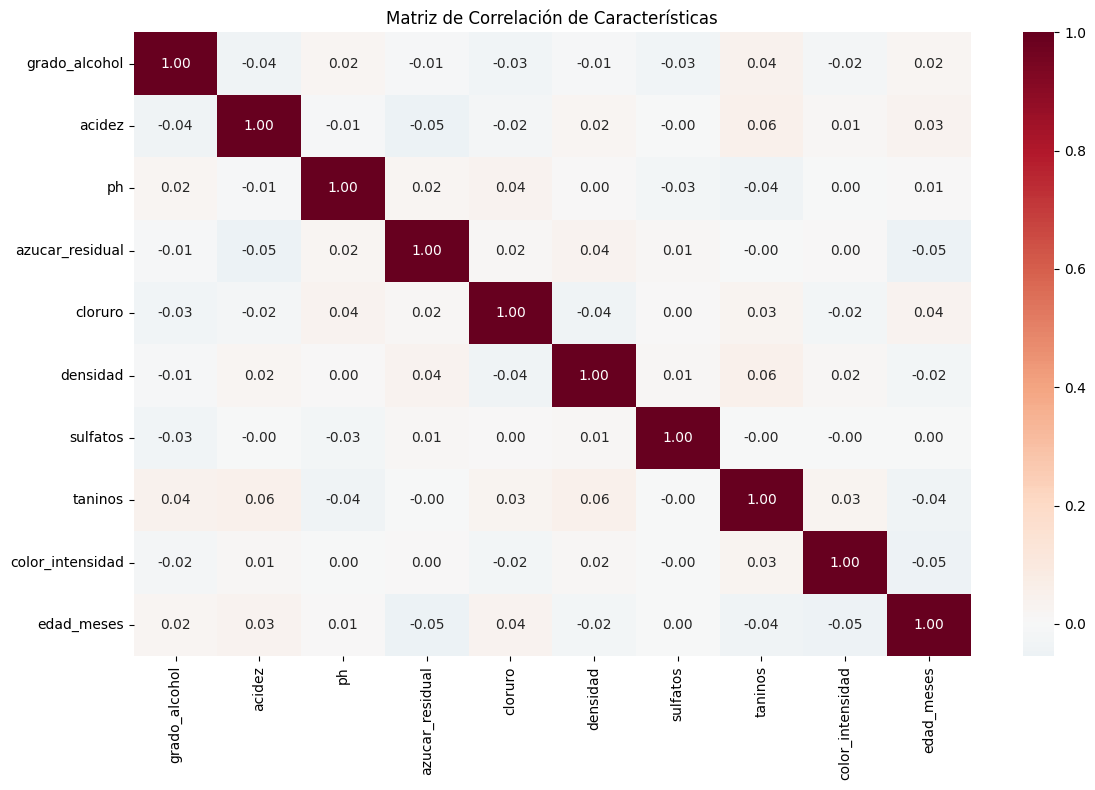

In [ ]:
print("Dimensiones del dataset:", X.shape)
print("\nDistribución de clases (0: Calidad Regular, 1: Calidad Premium):")
print(pd.Series(y).value_counts(normalize=True))

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(X.describe())

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='RdBu_r', center=0, annot=True, fmt='.2f')
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

# 4. Selección de características
# Utilizamos SelectKBest

In [ ]:
k = 5  # Seleccionaremos las 5 mejores características
selector = SelectKBest(score_func=f_classif, k=k)
X_seleccionado = selector.fit_transform(X, y)

# Obtener los nombres de las características seleccionadas
caracteristicas_seleccionadas = X.columns[selector.get_support()].tolist()

print("\nCaracterísticas seleccionadas:")
for caracteristica in caracteristicas_seleccionadas:
    print(f"- {caracteristica}")


Características seleccionadas:
- grado_alcohol
- acidez
- taninos
- color_intensidad
- edad_meses


# 5. Preparación de datos

In [ ]:
X_seleccionado_df = X[caracteristicas_seleccionadas]

# Escalado de características
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X_seleccionado_df)

# División en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X_escalado, y, test_size=0.2, random_state=42
)

# 6. Entrenamiento del modelo
# Usamos Random Forest como clasificador

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_entrenamiento, y_entrenamiento)

RandomForestClassifier(random_state=42)

# 7. Evaluación del modelo
# Predicciones


Informe de Clasificación:
                 precision    recall  f1-score   support

Calidad Regular       1.00      0.92      0.96        97
Calidad Premium       0.93      1.00      0.96       103

       accuracy                           0.96       200
      macro avg       0.96      0.96      0.96       200
   weighted avg       0.96      0.96      0.96       200



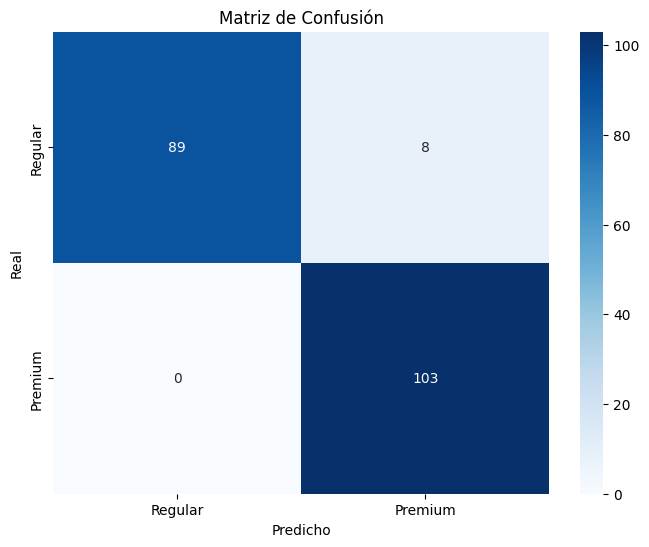

In [ ]:
y_pred = modelo_rf.predict(X_prueba)

# Métricas de evaluación
print("\nInforme de Clasificación:")
print(classification_report(y_prueba, y_pred,
                          target_names=['Calidad Regular', 'Calidad Premium']))

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_prueba, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Regular', 'Premium'],
            yticklabels=['Regular', 'Premium'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 8. Importancia de características

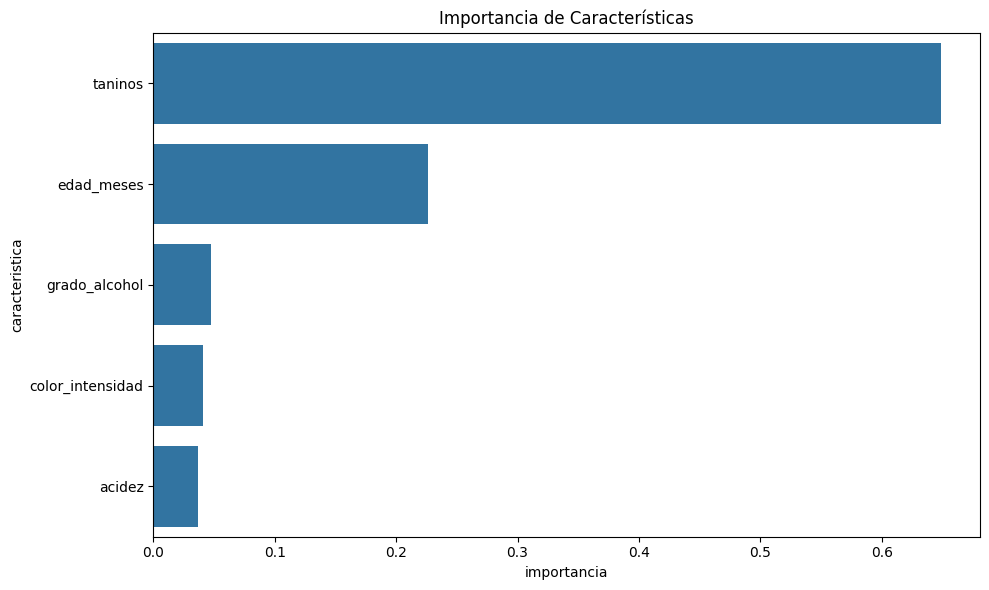

In [ ]:
importancia = pd.DataFrame({
    'caracteristica': caracteristicas_seleccionadas,
    'importancia': modelo_rf.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='caracteristica', data=importancia)
plt.title('Importancia de Características')
plt.tight_layout()
plt.show()


# 9. Conclusiones

In [ ]:
print("\nCONCLUSIONES:")
print(f"1. El modelo alcanzó una precisión del {accuracy_score(y_prueba, y_pred)*100:.2f}% en el conjunto de prueba.")
print("2. Las características más importantes para la predicción fueron:",
      ", ".join(importancia['caracteristica'].head(3).tolist()))
print(f"3. El proceso de selección de características redujo la dimensionalidad de {X.shape[1]} a {k} características.")
print("4. El modelo muestra un buen balance entre la clasificación de vinos regulares y premium, como se puede ver en la matriz de confusión.")


CONCLUSIONES:
1. El modelo alcanzó una precisión del 96.00% en el conjunto de prueba.
2. Las características más importantes para la predicción fueron: taninos, edad_meses, grado_alcohol
3. El proceso de selección de características redujo la dimensionalidad de 10 a 5 características.
4. El modelo muestra un buen balance entre la clasificación de vinos regulares y premium, como se puede ver en la matriz de confusión.
